# Serie 10
Ce document contient les différents exercices à réaliser. Veuillez compléter et rendre ces exercices pour la semaine prochaine.

Pour chaque exercice:
* implémentez ce qui est demandé
* commentez votre code
* expliquez **en français or English** ce que vous avez codé dans la cellule correspondante

Dans vos explications à chacun des exercices, indiquez un pourcentage subjectif d'investissement de chaque membre du groupe. **Des interrogations aléatoires en classe pourront être réalisées pour vérifier votre contribution/compréhension**.

Les tentatives infructueuses, les explications, commentaires et analyses des échecs **rapportent des points**. Ne rendez pas copie-blanche, même si votre fonction n'est pas correcte.

## Exercice 1
Implémentez une type de données abstrait `HashTable` (table de hachage) qui utilise une dispersion linéaire (linear probing strategy) pour résoudre les collisions. La classe `HashTable` et ses fonctions à implémenter sont données - libre à vous cependant d'ajouter de nouvelles méthodes aux aux classes. Vous pouvez optionnellement utiliser une dispersion quadratique.

Vous devez implémenter une classe `HashableImpl` dont les fonctions sont données. Cela correspond aux éléments qui seront stockés dans la hash table.

In [207]:
# Représente un élément pouvant être stocké dans une instance de HashTable.
class HashableImpl:
    key = None
    is_active = True
    def __init__(self, key, is_active = True):
        self.key = key
        self.is_active = is_active  # (useless for you but keep it)

    # Calcule le hash de cette instance de HashableImpl.
    # La valeur retournée est un hash, représenté par un nombre entier.
    def hash(self, table_size):
        return self.key % table_size

    # Retourne la clé comme représentation de cette instance
    # (vous n'avez pas besoin de modifier cette fonction).
    def __str__(self):
        return str(self.key)


class HashTable:
    def __init__(self, size = 10):
        self.ht = [] # Initialise la liste utilisée pour stocker les éléments de la hashtable
        self.size = 0 # Compte le nombre de clés présentes dans la table
        self.collision = 0
        self.ht = [None for c in range(size+1)]

    # Indique le nombre de collisions qui ont eu lieu lors de la recherche d'éléments dans la hashtable
    def number_of_collisions(self):
        return self.collision

    # Vide la hashtable et réinitialise le compteur de collisions
    def make_empty(self):
        for c in range(len(self.ht)):
            self.ht[c] = None
        self.collision = 0
        self.size = 0            

    # Vérifie si la hashtable est vide ou pas.
    # Retourne True si la hashtable est vide, False sinon
    def is_empty(self):
        if self.size > 0:
            return False
        return True

    # Insére un élément x HashableImpl dans la hash table.
    def insert(self, x):
        position = self.findpos(x, True)
        self.ht[position] = x
        self.size +=1

        if self.size/(len(self.ht)) < 0.5:
            return 
        else:
            old_ht = self.ht
            self.ht = [None for c in range(self.nextPrime((2*len(old_ht))))]
            self.size = 0
            index = 0
            while index < len(old_ht):
                if not old_ht[index] is None:
                    self.insert(old_ht[index])
                index += 1
        

    # Supprime l'élément x HashableImpl de la hash table
    # Une exception ItemNotFound est levée si l'élément ne se trouve pas dans la liste
    def remove(self, x): # Throws ItemNotFound
        position = self.findpos(x, True)
        if self.ht[position] is None:
            raise ItemNotFound()
        self.ht[position] = None
        self.size -=1

    # Trouve l'élément x HashableImpl dans hash table
    # Une exception ItemNotFound est levée si l'élément ne se trouve pas dans la liste
    # Retourne l'élément HashableImpl
    def find(self,x): # Throws ItemNotFound      
        position = self.findpos(x, True)
        if self.ht[position] is None:
            raise ItemNotFound()
        return self.ht[position]

    def findpos(self, x, count_collision):
        collisionNum = 0
        currentPos = x.hash(len(self.ht))
        while (self.ht[currentPos] is not None) and not self.ht[currentPos].key == x.key:
            collisionNum += 1
            currentPos += 2 * collisionNum - 1
            if currentPos >= len(self.ht):
                currentPos -= len(self.ht)

        if count_collision:
            self.collision = collisionNum
            
        return currentPos

    
    def nextPrime(self, n):
        if (n % 2 == 0):
            n+=1
        while not self.isPrime( n ):
            n += 2
        return n
        
        
    def isPrime(self, n):
        if n%2 == 0:
            return False  
        i=3
        while i*i <= n:
            if (n % i == 0):
                return False
            i+=2
        return True

        
class Error(Exception):
    pass

class ItemNotFound(Error):
    pass

In [209]:
def test_unexisting_value(hashable):
    try:
        ht.find(hashable)
        print("Error: the item '", hashable, "' must not exist in the hash table")
    except ItemNotFound:
        pass
    except Exception as e:
        print("Error: an unexpected exception has been raised", type(e), ":", e)
        raise

ht = HashTable()
assert ht.is_empty() == True
h1 = HashableImpl(156)
ht.insert(h1)
assert ht.is_empty() == False
h2 = HashableImpl(90)
ht.insert(h2)
h3 = HashableImpl(31)
ht.insert(h3)
print("Should display three elements, while the other entries should be None:")
for e in ht.ht:
    if e is not None:
        if e.is_active:
            print(e)
    else:
        print(e)
print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert ht.find(h1) != None
assert ht.find(h2) != None
assert ht.find(h3) != None

temp1 = ht.find(h1)
print("h1: ", temp1.key)
temp3 = ht.find(h3)
print("h3: ", temp3.key)
print()
ht.remove(h2)
print("Should display two elements, while the other entries should be None:")
for e in ht.ht:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)
print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert ht.find(h1) != None
test_unexisting_value(h2)
assert ht.find(h3) != None

h4 = HashableImpl(41)
ht.insert(h4)
h5 = HashableImpl(54)
ht.insert(h5)
print("Should display four elements, while the other entries should be None:")
for e in ht.ht:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert ht.find(h1) != None
test_unexisting_value(h2)
assert ht.find(h3) != None
assert ht.find(h4) != None
assert ht.find(h5) != None

h6 = HashableImpl(716)
ht.insert(h6)
print("Should display five elements, while the other entries should be None:")
for e in ht.ht:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
assert ht.find(h1) != None
test_unexisting_value(h2)
assert ht.find(h3) != None
assert ht.find(h4) != None
assert ht.find(h5) != None
assert ht.find(h6) != None

ht.make_empty()
assert ht.is_empty() == True
print("Should display all entries as None:")
for e in ht.ht:
    if e is not None:
        if e.is_active:
            print(e)
        else:
            print(None)
    else:
        print(e)

print()

test_unexisting_value(HashableImpl(0))
test_unexisting_value(HashableImpl(1))
test_unexisting_value(h1)
test_unexisting_value(h2)
test_unexisting_value(h3)
test_unexisting_value(h4)
test_unexisting_value(h5)
test_unexisting_value(h6)

try:
    ht.remove(h4)
    print("Error: an ItemNotFound exception must be raised")
except ItemNotFound:
    pass
except Exception as e:
    print("Error: an unexpected exception has been raised", type(e), ":", e)
    raise

Should display three elements, while the other entries should be None:
None
None
156
90
None
None
None
None
None
31
None

h1:  156
h3:  31

Should display two elements, while the other entries should be None:
None
None
156
None
None
None
None
None
None
31
None

Should display four elements, while the other entries should be None:
None
None
156
None
None
None
None
None
41
31
54

Should display five elements, while the other entries should be None:
None
716
156
None
None
None
None
None
41
31
54

Should display all entries as None:
None
None
None
None
None
None
None
None
None
None
None



### Explications

<< A REMPLIR PAR L'ETUDIANT >>

### Exercice 1.1
Créer une hash table de taille 997. Disperser dans la table $n$ clés, pour chaque $n$ entier dans $[200,900]$.



```python
    # Dispersion
    for i in range(n):
        a_key = np.random.randint(4242)
        h = HashableImpl(a_key, True)
        hash_table.insert(h)
```



Un *miss* (similaire à une collision) est, lors d'une phase de sondage, la visite d'une cellule de la table qui ne correspond pas à la clé recherchée.

Pour chaque $n$, afficher le nombre de *miss* pour 100 requêtes `find` de clés existantes (les choisir au hasard).





Quelle est la relation entre le facteur de charge (load factor) de la table de hachage et le nombre de miss ?

In [301]:
import random

def assess_find(number_of_elements):
    hash_table = HashTable(997)
    
    for i in range(n):
        a_key = np.random.randint(4242)
        h = HashableImpl(a_key, True)
        hash_table.insert(h)

    for i in range(0, 20000):
        index = random.randint(0,997)
        elt = hash_table.ht[index]
        while elt is None:
            index = random.randint(0,997)
            elt = hash_table.ht[index]
        hash_table.find(elt)
        
    return hash_table.number_of_collisions()

result = []
total_collisions = 0

for n in range(200, 900, 10):
    collisions = assess_find(n)
    total_collisions += collisions
    result.append((n, total_collisions))

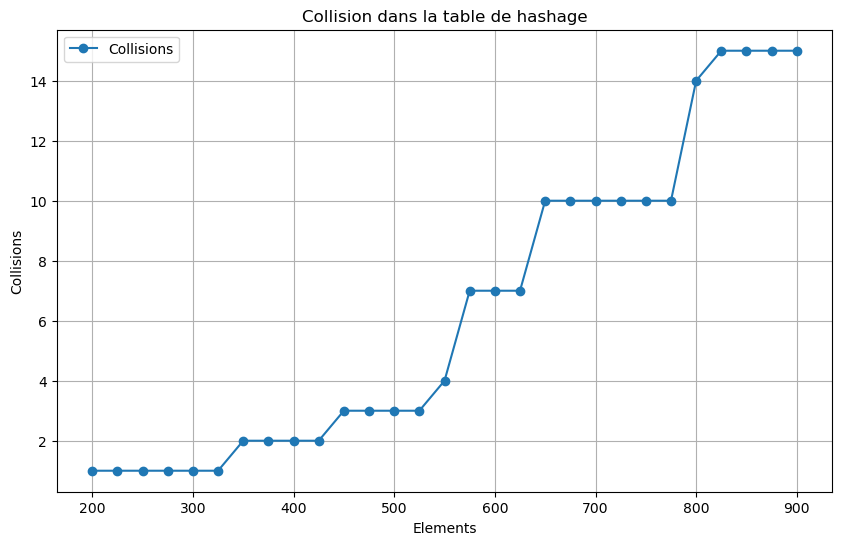

In [312]:
import matplotlib.pyplot as plt

elements, collisions = zip(*results_wo_realloc)

plt.figure(figsize=(10, 6))
plt.plot(elements, collisions, marker="o", label="Collisions")
plt.xlabel("Elements")
plt.ylabel("Collisions")
plt.title("Collision dans la table de hashage")
plt.grid(True)
plt.legend()
plt.show()


Le graphe montre que plus la table devient chargée (facteur de charge élevé) plus le nombre de collisions augmente rapidement (de manière exponentielle).

### Exercice 1.2
Quelle est la particularité de 997, la taille choisie pour la hash table ?

<< A REMPLIR PAR L'ETUDIANT >>